I have mainly made this notebook to explain different parts of the code I have developped and to include some visualizations of use case examples.

# What is Battleship Game?

Battleship is a strategy game for two players. Each player owns many ships, tries to guess the positions of the opponent ones and destroy them by choosing the cells to hit one by one. The objective of the game is to destroy the opposing player's ships.

<center><img src="images/Battleship_game_board.png" width="360" height="360"><br>
figure</center>

# What is this implementation about?
I have developped a script for this game, which can be used in two different ways. The first one consistes of playing the game and the second use case is to generate data related to the game progress. I will explain in more details the 2 use cases.
## Playing or Simulating the Game
This part consists of playing against the computer. Two ships are randomly placed in a field and a human user has to find the ships positions after a minimum number of guess. Another game mode consists of simulating and visualizing a game where the computer has also to destroy randomly placed ships.
## Genarating Data
This use case consists of generating and prepare data which can be used as a machine learning model. The main idea of this part is to simulate many games and save the state set of each one as well as the output of each action, i.e., whether it was a good move or not.

# Code Design and Classes

## Design

As we can see in the `tree` functon output, there are two main directoris: `src` which contains the main program implementation and `tests` for testing functionalities. The `images` directory is used for the images used in this notebook.

In [12]:
! tree --dirsfirst -L 2

.
├── images
│   └── Battleship_game_board.png
├── src
│   ├── __pycache__
│   └── Battleship.py
├── tests
└── Battleship.ipynb

4 directories, 3 files


## Classes

Le me describe at a high level the implemented classes from general to specific. The `Battleship` class represents the main game instance. It initializes and updates all the game parameters and object such as the field, the number and positions of the ships, etc. This class can be used to play or simulate games, as well as generate data and show game-related visualizations.

The second class is `Field` which represents the grid that will be used for the game. It contains `Ship` instances and composed of `Cell`'s.

When creating a `Battleship` instance, a field is initialized, then the ships are created and randomply placed in the fields. Ships can be vertical or horizontal, and can't be superposed. 

In [13]:
from src.Battleship import *

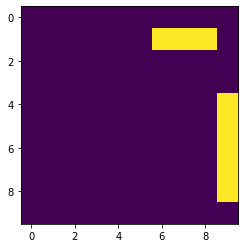

In [20]:
bs = Battleship()
bs.showShips()

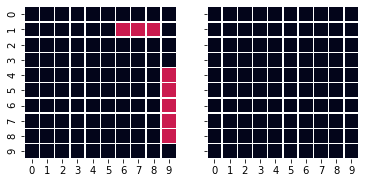

In [23]:
f, axarr = plt.subplots(1, 2, sharex=True, sharey=True)
for ax in axarr:
    ax.set(adjustable='box', aspect='equal')
bs.showState(f, axarr)